### The objective of this notebook is to better understand how various products from an e-commerce company perform across regions, in order to devise its sales strategy for next year.
### This notebook begins with an analysis on the data set with analytical insights discussed under their respective code cells. 
### The three questions answered towards the end of the notebook are:
- What conclusions can you draw about sales performance of various products and regions?
- What recommendations do you have for the business?
- Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data.csv")

Before we start analyzing the data we can first take a look at the structure of the data by looking at the head of the dataframe.

In [3]:
df.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


Now let's get a summary of the dataset structure

In [4]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


By taking a look at the summary of the dataset we can see that there are a few missing values for all of the columns except the "Sale Date" column. This means that we will have to clean this data and decide if we want to impute and/or eliminate some data.

I am not going to impute the categorical values "Product" and "Region" because if I set all the null values of those columns to the mode of the category that may cause one region or product to seem more dominant than it really is. Instead I will drop the rows that have null values for 'Product' and 'Region'.  

In [5]:
df_drop_nulls = df.dropna(subset=['Product', 'Region'])

In [6]:
df_drop_nulls.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       766 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


We can get some descriptive statistics as well

In [7]:
df_drop_nulls.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,851,851,766.000000,762.000000,851
unique,50,10,NaN,NaN,810
top,Product_4,Region_5,NaN,NaN,2022-01-02
freq,28,100,NaN,NaN,2
mean,NaN,NaN,105.630927,10.258530,NaN
std,NaN,NaN,153.981617,3.294177,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,28.290000,8.000000,NaN
50%,NaN,NaN,66.520000,10.000000,NaN
75%,NaN,NaN,136.390000,13.000000,NaN


By observing our descriptive statistics:
- We can see that the number of units sold seems to be in a reasonable range from 2 to 22.
- We can see also that there is a large range in prices, as the range is from $0.19 to $2636.9. This could either mean that there are some products that are very expensive and some that are very cheap OR this could mean that we have outliers that are possibly due to some error.

Let's have a look at all the products and their price info to see if there are any products that are actually generally priced very high or low.

In [8]:
df_drop_nulls.groupby('Product')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
Product_1,17.0,98.842941,115.123107,3.40,42.7400,72.550,100.2300,441.99
Product_10,16.0,103.243125,76.169202,3.63,52.9350,94.755,123.8450,258.01
Product_11,11.0,125.675455,101.797424,21.70,60.5050,85.430,154.5450,333.79
Product_12,13.0,81.461538,66.493280,2.37,30.6700,82.690,109.9100,207.17
Product_13,17.0,88.629412,85.923571,12.86,18.2100,54.910,145.8400,274.59
Product_14,9.0,105.698889,144.897940,10.35,18.3700,55.650,104.8100,469.65
Product_15,19.0,89.121053,102.348294,5.71,24.2300,39.720,140.4600,409.83
Product_16,12.0,78.740833,108.664034,4.52,11.0675,46.760,96.6650,395.76
Product_17,17.0,119.851765,74.297447,5.39,58.6500,120.080,158.5900,248.85


By looking at the descriptive statistics of the prices for each product we can see that there aren't any products that have a mean price that is extremely high. Therfore we know that those extremely high prices are most likely errors.

To get a faster understanding of the mean prices we can see how many products don't have a mean price that fall into the range of $45 to $150

In [9]:
mean_product_price = df_drop_nulls.groupby('Product')['Price'].mean()

mean_price_out_of_range = mean_product_price[(mean_product_price >= 150) | (mean_product_price <= 45)]

print(mean_price_out_of_range)

Product
Product_27    193.255238
Product_34    253.598235
Product_49    169.012000
Product_50    168.466522
Name: Price, dtype: float64


We can see that products 27, 34, 49, and 50 have mean prices that are outside of our specified range, this could be because there are outlier prices for these products that cause their mean to be higher than the others. Let's take a look.

We can also plot the 'Price' and 'Units Sold' data to get a visual understanding

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Units Sold'}>]], dtype=object)

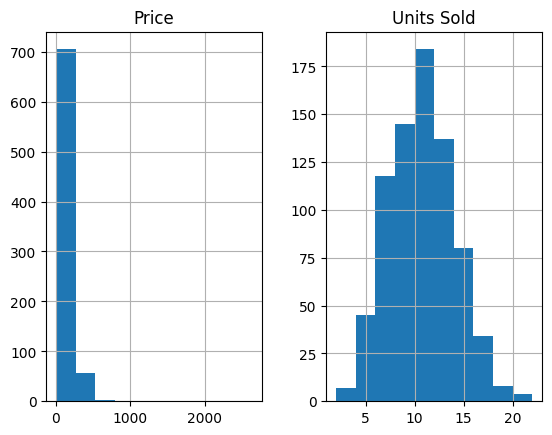

In [10]:
df_drop_nulls.hist()

We can notice that the "Unit Sold" data follows a normal distribution pattern. The "Price" distribution on the other hand has most of the data falling at the beginning of the x-axis and very little after that. Therefore I will remove the outliers from the price data.

Let's take a look at how many product prices were on the extremly low end and high end of the price range. So we can look at the products that were above $650 and below $2

In [11]:
df_drop_nulls[df_drop_nulls['Price']>650]

,Product,Region,Price,Units Sold,Sale Date
269,Product_49,Region_8,1296.0,14.0,2022-09-27
407,Product_27,Region_7,1793.9,9.0,2023-02-12
421,Product_34,Region_2,2636.9,14.0,2023-02-26
745,Product_50,Region_10,650.5,6.0,2024-01-16


In [12]:
df_drop_nulls[df_drop_nulls['Price']<2]

,Product,Region,Price,Units Sold,Sale Date
6,Product_31,Region_10,1.60,11.0,2022-01-07
101,Product_32,Region_7,1.66,NaN,2022-04-12
115,Product_24,Region_9,0.25,7.0,2022-04-26
358,Product_46,Region_6,0.71,6.0,2022-12-25
414,Product_36,Region_9,0.27,11.0,2023-02-19
441,Product_44,Region_10,0.19,NaN,2023-03-18
497,Product_25,Region_9,1.96,13.0,2023-05-13
499,Product_21,Region_9,0.31,9.0,2023-05-15
634,Product_21,Region_7,0.19,12.0,2023-09-27
666,Product_9,Region_2,1.49,12.0,2023-10-29


From our analysis so far we can see that there are a significant number of products sold below $2 but very few sold over $650, therefore I will eliminate products that were priced over $650 as those prices are likely to be errors. We can even see that the 4 products that were priced over $650 (Product_49, Product_27, Product_34, and Product_50) are the same ones who's mean price didn't fall into the range of $45 to $150.

We can get rid of the outliers but we can keep the rows where the "Price" is NaN as those values can be imputed.

In [13]:
df_noout = df_drop_nulls[(df_drop_nulls['Price']<650) | (pd.isnull(df_drop_nulls['Price']))]

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Units Sold'}>]], dtype=object)

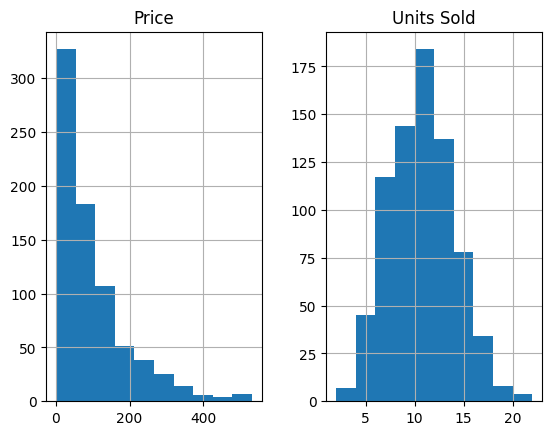

In [14]:
df_noout.hist()

Now we can look at the summary of our dataset with the outliers removed

In [15]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     847 non-null    object 
 1   Region      847 non-null    object 
 2   Price       762 non-null    float64
 3   Units Sold  758 non-null    float64
 4   Sale Date   847 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


In [16]:
rows_with_NaN_price = df_noout[df_noout['Price'].isnull()]
rows_with_NaN_price

,Product,Region,Price,Units Sold,Sale Date
2,Product_1,Region_5,NaN,4.0,2022-01-03
20,Product_6,Region_9,NaN,12.0,2022-01-21
23,Product_19,Region_4,NaN,11.0,2022-01-24
39,Product_20,Region_5,NaN,7.0,2022-02-09
40,Product_14,Region_9,NaN,7.0,2022-02-10
...,...,...,...,...,...
1005,Product_10,Region_1,NaN,14.0,2023-03-16
1009,Product_26,Region_3,NaN,6.0,2022-05-01
1029,Product_41,Region_8,NaN,12.0,2022-10-20
1032,Product_45,Region_5,NaN,12.0,2024-01-18


We can see that there are 85 missing prices. Before imputing the prices, I want to make sure that there isn't a particular region, product or sale date where there is a skewed number of missing prices.

<Axes: xlabel='Region'>

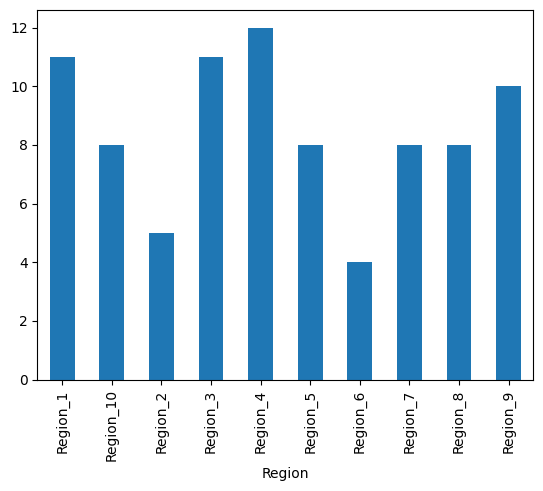

In [17]:
null_price_counts = df_noout[df_noout['Price'].isnull()].groupby('Region').size()
null_price_counts.plot(kind='bar')

<Axes: xlabel='Product'>

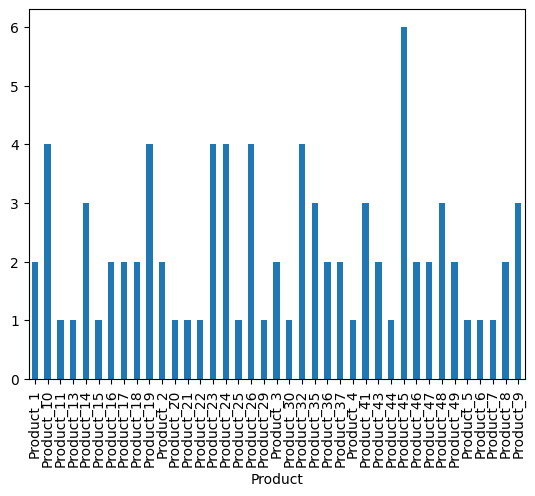

In [18]:
null_price_counts = df_noout[df_noout['Price'].isnull()].groupby('Product').size()
null_price_counts.plot(kind='bar')

<Axes: xlabel='Sale Date'>

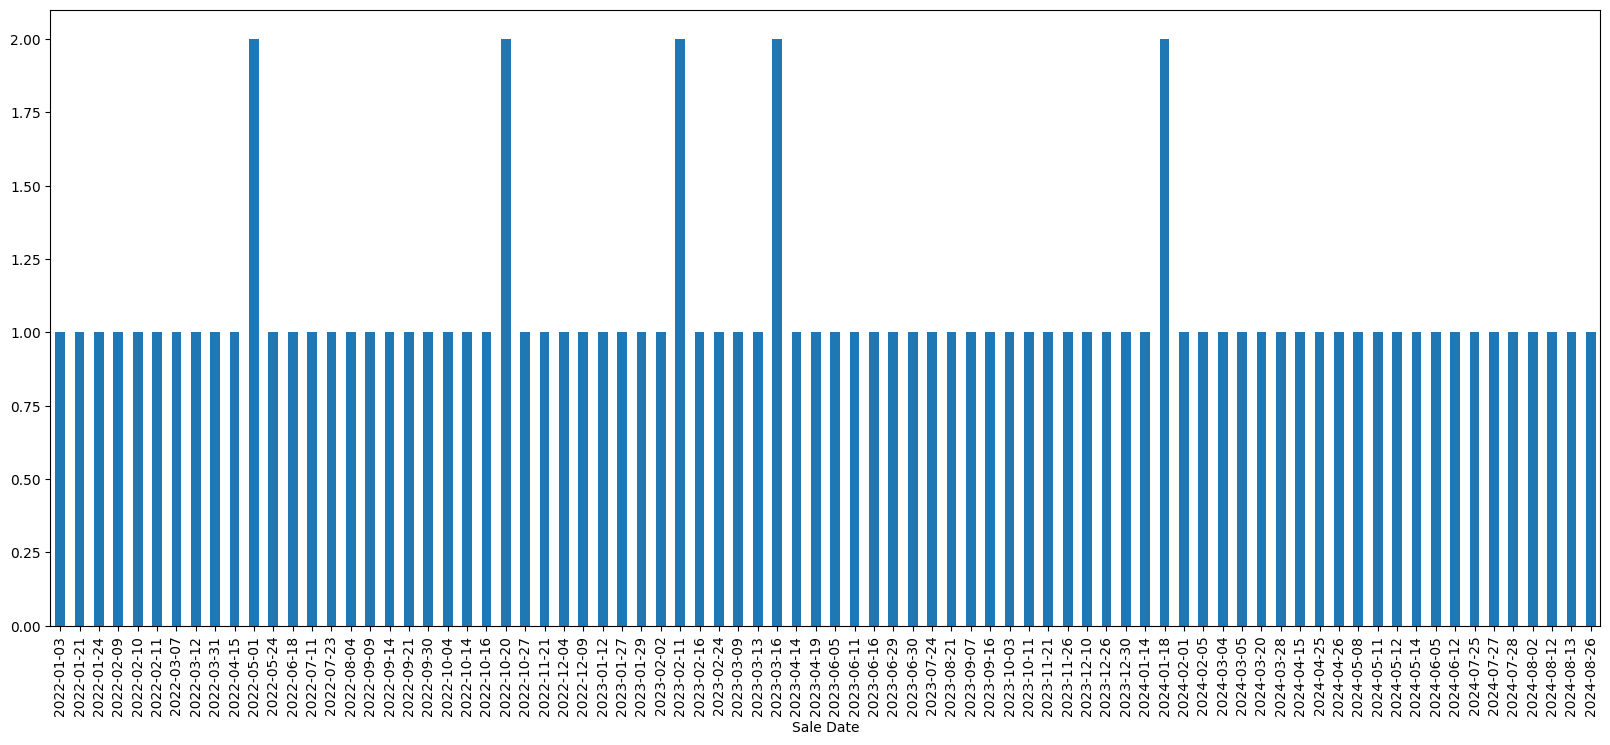

In [19]:
null_price_counts = df_noout[df_noout['Price'].isnull()].groupby('Sale Date').size()
null_price_counts.plot(kind='bar', figsize=(20, 8))

From the three graphs above we can see that no region had more than 12 missing prices, no product had more than 6 missing prices and no sale date had more than 2 missing prices. Therefore I believe that the missing prices aren't skewed in any way and it is safe for us to impute them.

To impute them I will set the value of any missing price to the median price of that particular product.

In [20]:
median_price_per_prod = df_noout.groupby('Product')["Price"].median()
print(median_price_per_prod)

Product
Product_1      72.550
Product_10     94.755
Product_11     85.430
Product_12     82.690
Product_13     54.910
Product_14     55.650
Product_15     39.720
Product_16     46.760
Product_17    120.080
Product_18    106.030
Product_19    119.520
Product_2      41.140
Product_20     39.860
Product_21     68.950
Product_22     58.480
Product_23    102.150
Product_24     48.880
Product_25     53.970
Product_26     46.090
Product_27     51.715
Product_28     64.345
Product_29     65.570
Product_3      37.435
Product_30     60.135
Product_31     48.330
Product_32     50.895
Product_33     69.925
Product_34     97.260
Product_35     47.160
Product_36     69.715
Product_37     39.440
Product_38     86.840
Product_39     98.280
Product_4      58.770
Product_40     57.660
Product_41     60.560
Product_42     75.390
Product_43     61.050
Product_44     83.330
Product_45     84.850
Product_46     93.705
Product_47     64.510
Product_48     51.110
Product_49     95.960
Product_5      55.465
Pr

In [21]:
def nan_to_median(row):
    if pd.isnull(row['Price']):
        return median_price_per_prod[row['Product']]
    else:
        return row['Price']
    
df_noout['Price'] = df_noout.apply(nan_to_median, axis=1)

C:\Users\vivek\AppData\Local\Temp\ipykernel_35352\254297025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout['Price'] = df_noout.apply(nan_to_median, axis=1)


In [22]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     847 non-null    object 
 1   Region      847 non-null    object 
 2   Price       847 non-null    float64
 3   Units Sold  758 non-null    float64
 4   Sale Date   847 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


In [23]:
df_noout.head(15)

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,72.55,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10
10,Product_40,Region_5,119.96,8.0,2022-01-11
11,Product_3,Region_7,110.99,7.0,2022-01-12


We can also impute the missing 'Units Sold' values by filling the missing cells with the median 'Units Sold' value for the respecitve product.

In [24]:
median_units_sold_per_prod = df_noout.groupby('Product')['Units Sold'].median()
print(median_units_sold_per_prod)

Product
Product_1     11.0
Product_10    12.0
Product_11    12.0
Product_12    10.0
Product_13    10.0
Product_14    10.5
Product_15    11.0
Product_16    11.0
Product_17    11.0
Product_18    12.5
Product_19    11.0
Product_2     10.0
Product_20     9.0
Product_21    11.0
Product_22    11.0
Product_23    10.0
Product_24    11.0
Product_25     8.0
Product_26    10.0
Product_27     8.0
Product_28    11.0
Product_29    11.0
Product_3     10.0
Product_30     9.0
Product_31     9.0
Product_32    12.0
Product_33     9.0
Product_34     9.0
Product_35    10.0
Product_36    10.0
Product_37    10.0
Product_38    10.0
Product_39     9.0
Product_4      9.0
Product_40    10.0
Product_41    11.0
Product_42    10.0
Product_43     9.0
Product_44    10.0
Product_45    11.0
Product_46    10.0
Product_47    10.0
Product_48    10.0
Product_49    10.0
Product_5     10.0
Product_50     8.0
Product_6      9.0
Product_7     10.5
Product_8     12.0
Product_9     10.0
Name: Units Sold, dtype: float64


In [25]:
def nan_to_median_US(row):
    if pd.isnull(row['Units Sold']):
        return median_units_sold_per_prod[row['Product']]
    else:
        return row['Units Sold']
    
df_noout['Units Sold'] = df_noout.apply(nan_to_median_US, axis=1)

C:\Users\vivek\AppData\Local\Temp\ipykernel_35352\3010656464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout['Units Sold'] = df_noout.apply(nan_to_median_US, axis=1)


In [26]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     847 non-null    object 
 1   Region      847 non-null    object 
 2   Price       847 non-null    float64
 3   Units Sold  847 non-null    float64
 4   Sale Date   847 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


No we have completed the data cleaning process as our dataset no longer contains null values or outliers.

### Now we can begin to use our cleaned data to better understand how various products perform across regions and devise a sales strategy for next year.

Let's begin by plotting a bar graph of each region and how many orders each one got

<Axes: xlabel='Region'>

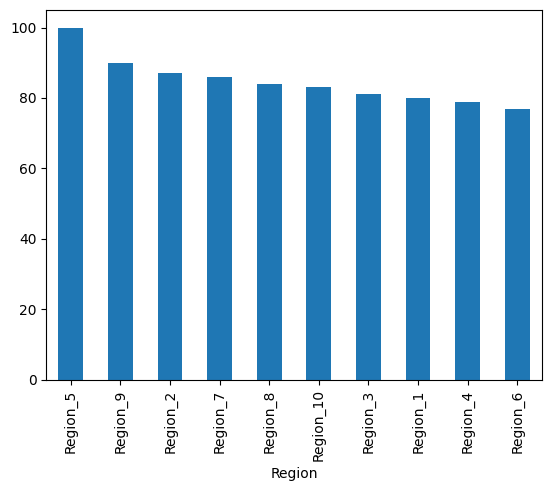

In [27]:
df_noout['Region'].value_counts().plot(kind='bar')

From this bar graph we can see that Region 5 has the most orders and Region 6 has the least orders.

Since this data is from an e-commerce company, a business strategy that they can employ is having their distribution centers in regions that receive the most orders. From our analysis we can see that the top 5 regions in terms of orders are regions: 5,9,2,7,8. By placing distribution centers at these locations the company (or customers) can save on delivery costs.

Next we can plot a bar graph that displays how many products were sold in each region.

<Axes: xlabel='Region'>

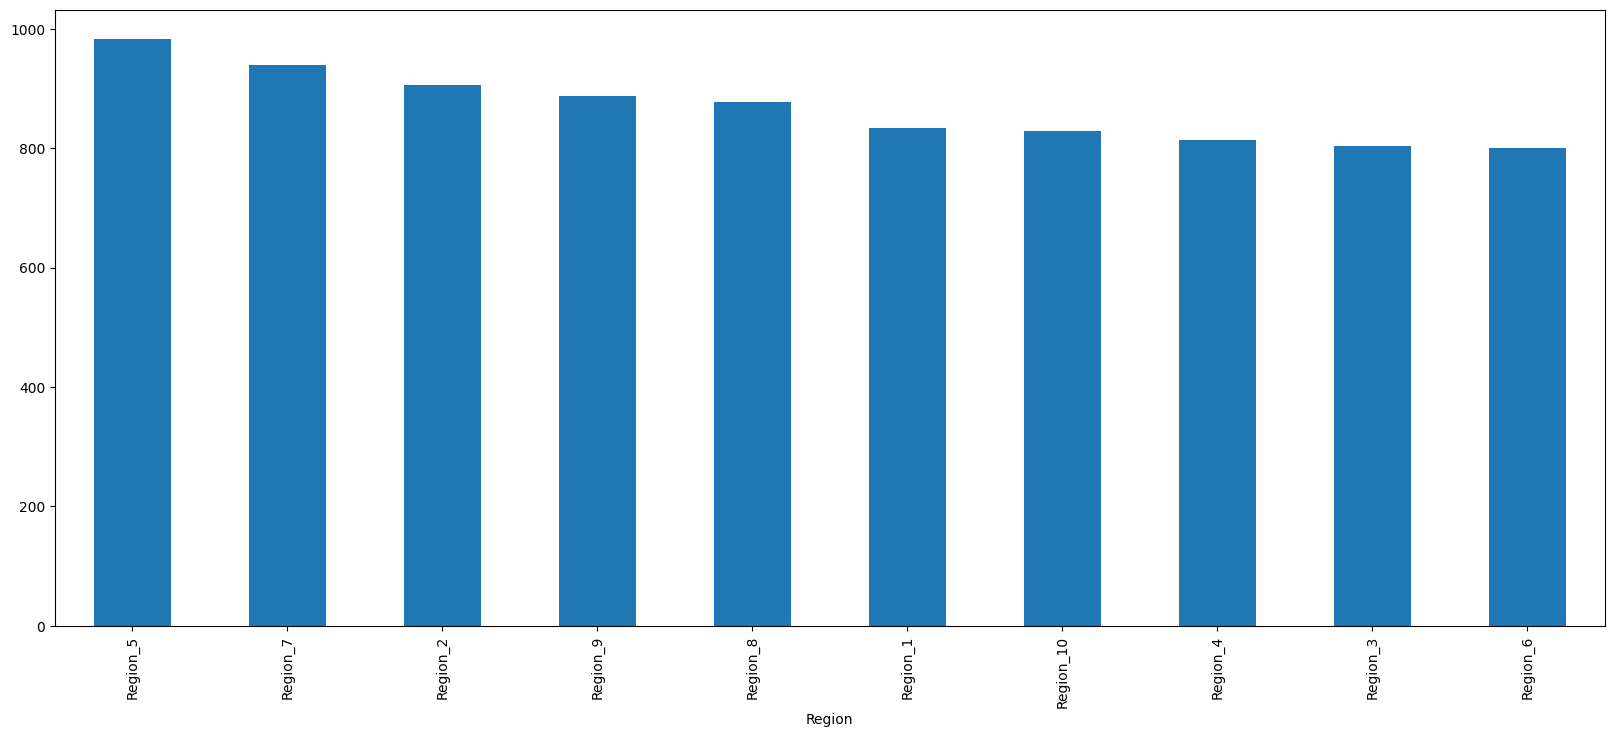

In [28]:
units_sold_per_region = df_noout.groupby('Region')['Units Sold'].sum().sort_values(ascending = False)
units_sold_per_region.plot(kind = 'bar', figsize=(20, 8))

We can see that even though Region 7 placed 4th in number of orders, it placed 2nd in number of units sold. This tell us that even though Region 7 might get fewer orders, these orders are for a lot of units. It is important to keep in mind that more orders does not necessarily mean more units solds.

So the top 5 regions in terms of units sold from most to least units sold are regions: 5, 7, 2, 9 and 8. By knowing this the ecommerce company can stock more products in regions 5, 7, 2, 9, 8 and they can stock less products in regions 1, 10, 4, 3, and 6. This will allow them to prevent overstocking or stock outs.

We can observe how many orders each product got.

<Axes: xlabel='Product'>

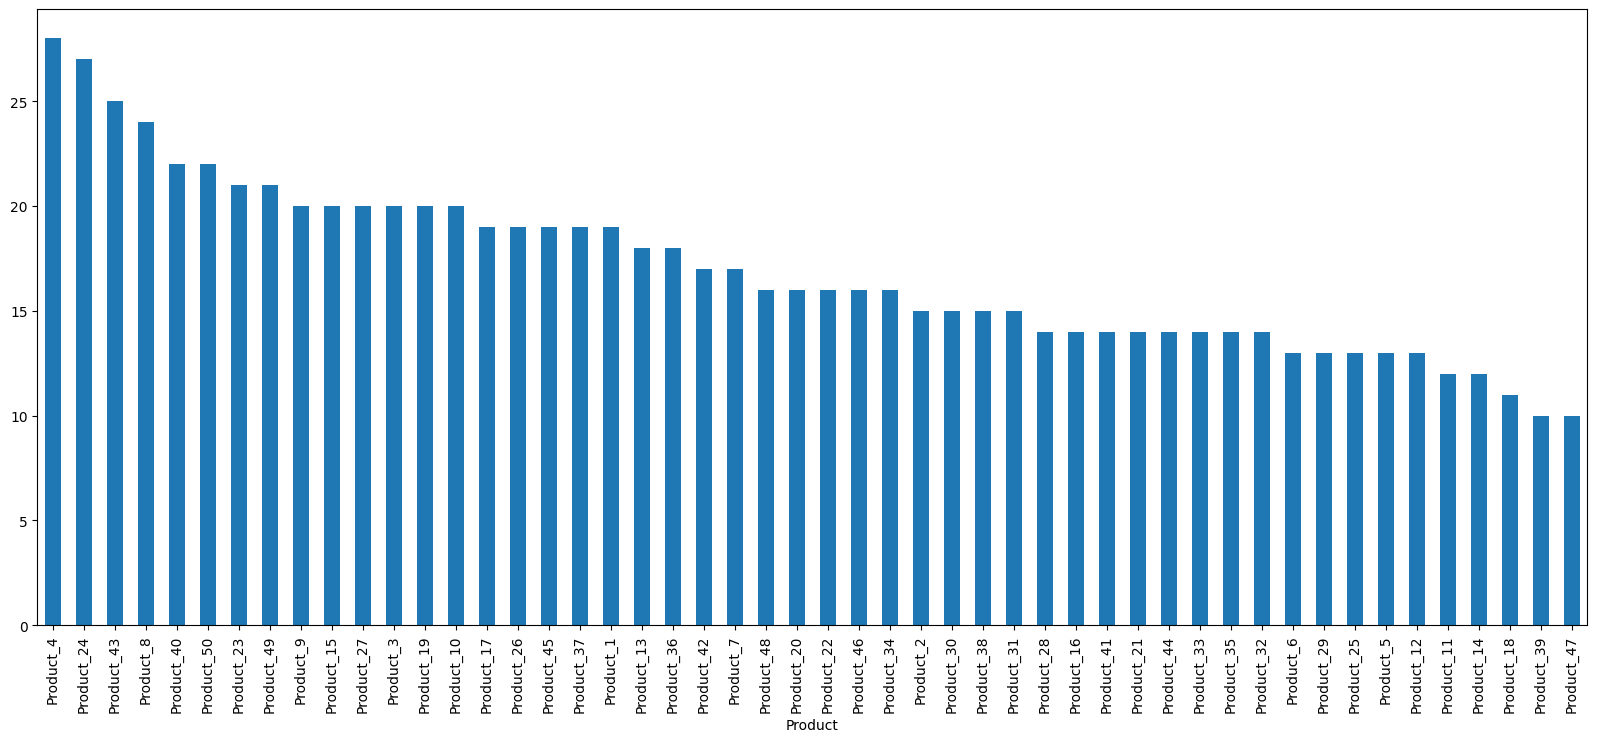

In [29]:
df_noout['Product'].value_counts().sort_values(ascending = False).plot(kind='bar', figsize=(20, 8))

From this graph we can see that products 4, 24, 43, 8, and 40 were the top 5 products in terms of number of orders. But we need to keep in mind that the number of times a product was ordered is not the same as how many units were sold. So let's plot how many units of each product was sold.

<Axes: xlabel='Product'>

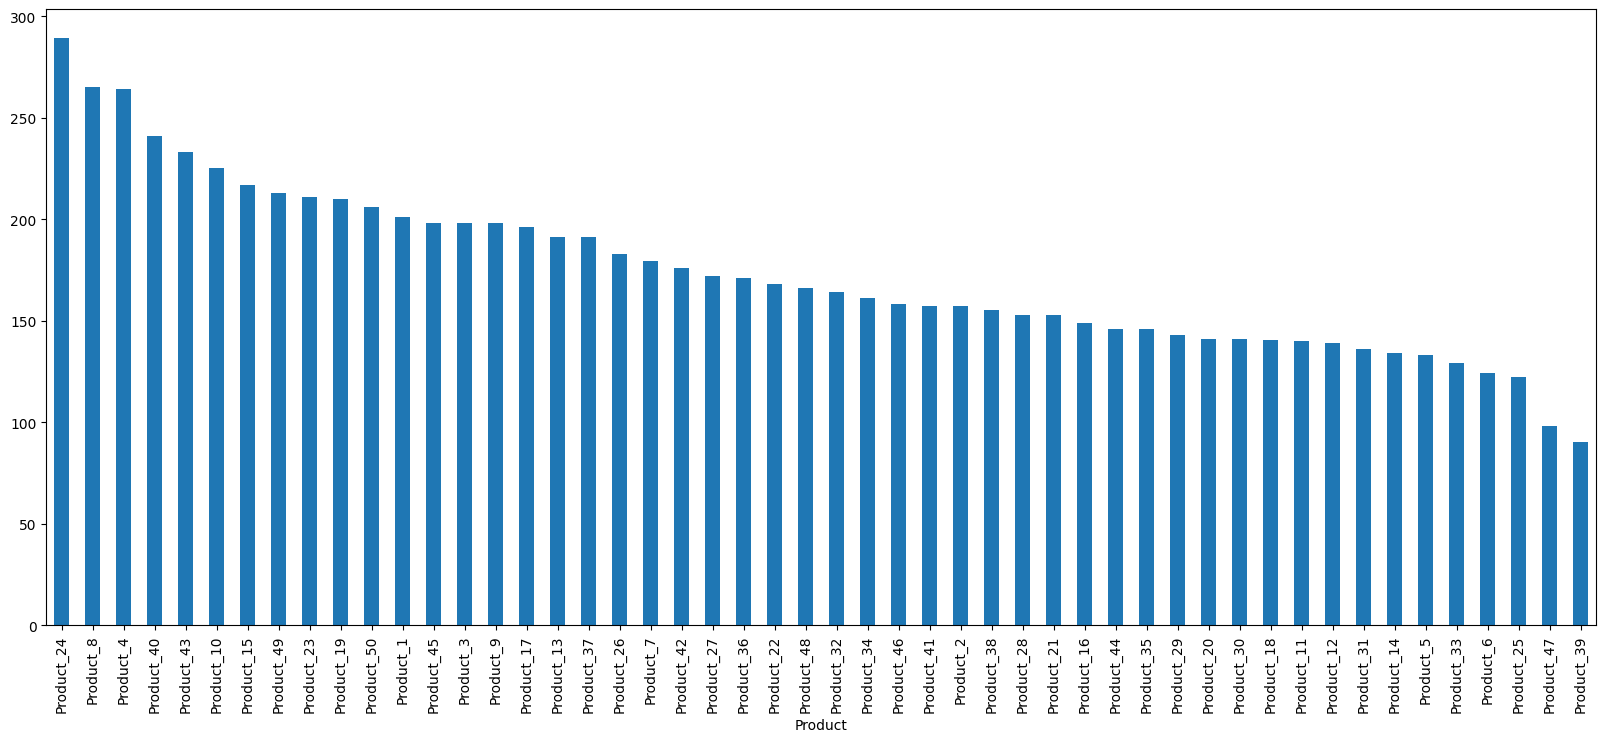

In [30]:
sales_per_prod = df_noout.groupby('Product')['Units Sold'].sum().sort_values(ascending = False)
sales_per_prod.plot(kind = 'bar', figsize=(20, 8))

We can see the top 5 most selling products were products: 24, 8, 4, 40, and 43. 

On the other hand the bottom 5 least selling products were: 33, 6, 25, 47, and 39.

The sales strategy that the company can employ is to shift advertising resources away from the products [24, 8, 4, 40, and 43] and towards products [33, 6, 25, 47, and 39] since the bottom 5 products could likely benefit from more promotion and the top 5 products don't require it as much.

Now we can plot the prices at which products have been sold to see at what price do products get the most sales.

<Axes: >

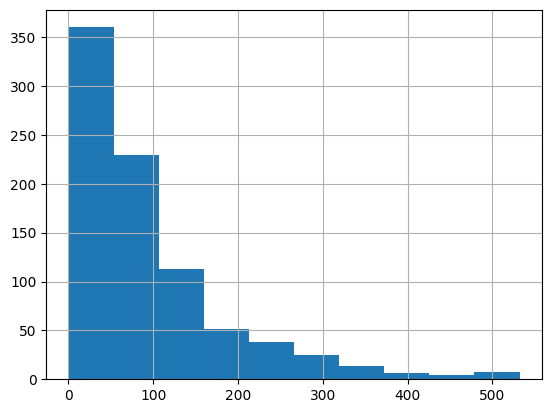

In [31]:
df_noout['Price'].hist()

Here we can see that products priced under $100 tend to sell the most. But we can get an even closer look by eliminating products priced over $100.

C:\Users\vivek\AppData\Local\Temp\ipykernel_35352\1452410602.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_price_0to100 = df_noout[df['Price'] <= 100]


<Axes: >

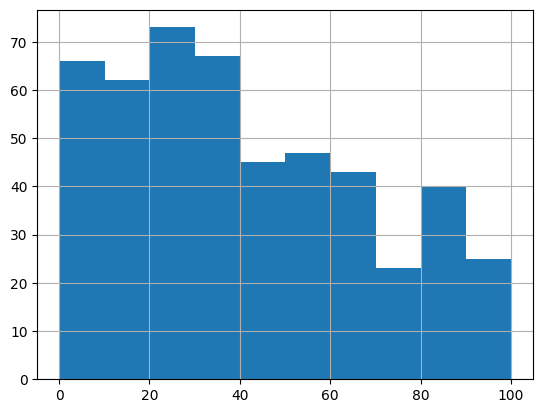

In [32]:
df_price_0to100 = df_noout[df['Price'] <= 100]
df_price_0to100['Price'].hist()

Now we can see that products that are priced between $20-$40 get the most sales. Therefore the company can try to sell more products at this price range to increase overall sales.

Next we can check which product is the most and least popular in each region

In [33]:
list_of_regions = df_noout['Region'].unique().tolist()
print(list_of_regions)

for x in list_of_regions :
    current_region = df[df['Region'] == x]

    units_sold_per_prod = current_region.groupby('Product')['Units Sold'].sum()
    top_seller = units_sold_per_prod.idxmax()

    print("Most sold item in " + x + " is " + top_seller)


['Region_2', 'Region_5', 'Region_8', 'Region_4', 'Region_10', 'Region_1', 'Region_7', 'Region_6', 'Region_9', 'Region_3']
Most sold item in Region_2 is Product_49
Most sold item in Region_5 is Product_8
Most sold item in Region_8 is Product_10
Most sold item in Region_4 is Product_45
Most sold item in Region_10 is Product_40
Most sold item in Region_1 is Product_10
Most sold item in Region_7 is Product_24
Most sold item in Region_6 is Product_7
Most sold item in Region_9 is Product_24
Most sold item in Region_3 is Product_26


By knowing which product is the most popular in each region, the company can make sure to always have that product stocked in the distribution facility closest to that region.

Next, we can plot the number of units sold in each order.

<Axes: >

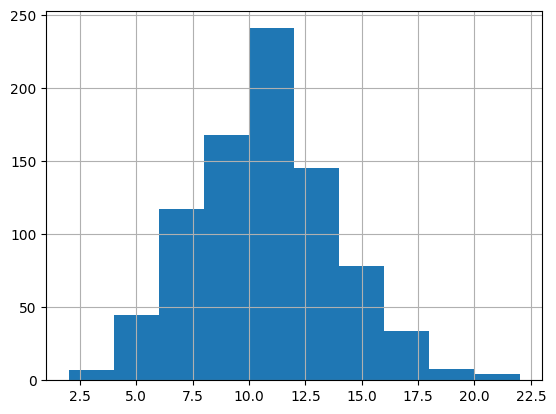

In [34]:
df_noout['Units Sold'].hist()

We can see that most probable number of units to be sold in an order is 10 to 13 units. With this information the ecommerce company can buy more packaging material that can fit 10 to 13 products and buy less packaging material that would be used for orders of less than 8 products or more than 15 products.

Finally we can observe how many orders were placed during different times of the year.

Before we begin let's make sure that our data set is not missing any dates for a particular year as that would skew the data.

In [35]:
df_noout['DATE TIME Sale Date'] = pd.to_datetime(df_noout['Sale Date'])
df_noout.head()
order_in_2022 = df_noout[df_noout['DATE TIME Sale Date'].dt.year == 2022]
print('Number of orders in 2022 is ' + str(len(order_in_2022)))

order_in_2023 = df_noout[df_noout['DATE TIME Sale Date'].dt.year == 2023]
print('Number of orders in 2023 is ' + str(len(order_in_2023)))

order_in_2024 = df_noout[df_noout['DATE TIME Sale Date'].dt.year == 2024]
print('Number of orders in 2024 is ' + str(len(order_in_2024)))

order_in_2024_before_sept = df_noout[(df_noout['DATE TIME Sale Date'].dt.year == 2024) & (df_noout['DATE TIME Sale Date'].dt.month <= 9)]
print('Number of orders in 2024 during and before September ' + str(len(order_in_2024_before_sept)))

order_in_2024_after_nov = df_noout[(df_noout['DATE TIME Sale Date'].dt.year == 2024) & (df_noout['DATE TIME Sale Date'].dt.month >= 10)]
print('Number of orders in 2024 during or after November is ' + str(len(order_in_2024_after_nov)))

Number of orders in 2022 is 310
Number of orders in 2023 is 298
Number of orders in 2024 is 239
Number of orders in 2024 during and before September 239
Number of orders in 2024 during or after November is 0


C:\Users\vivek\AppData\Local\Temp\ipykernel_35352\1976316787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout['DATE TIME Sale Date'] = pd.to_datetime(df_noout['Sale Date'])


We can see that there are much fewer orders for 2024, this is because the data for 2024 stops at the month of September. So we can elimnate 2024 before looking at the number of orders for each quarter of the year.

C:\Users\vivek\AppData\Local\Temp\ipykernel_35352\1483842196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2024['Quarter'] = df_before_2024['DATE TIME Sale Date'].dt.quarter


Quarter
1    163
2    149
3    144
4    152
dtype: int64


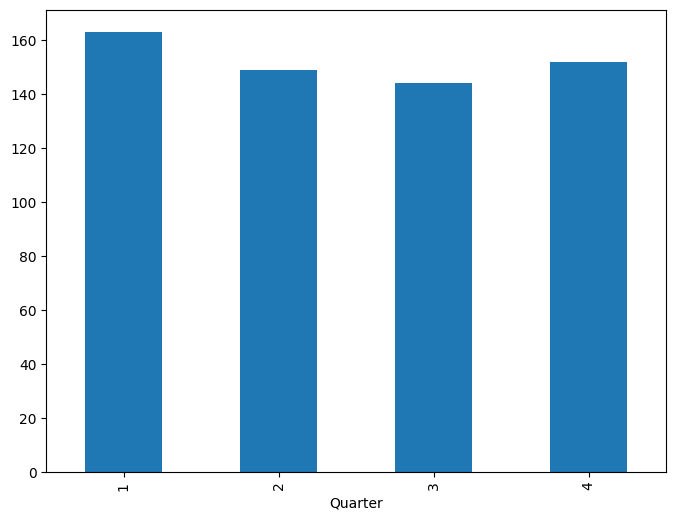

In [36]:
df_before_2024 = df_noout[df_noout['DATE TIME Sale Date'].dt.year <= 2023]
df_before_2024['Quarter'] = df_before_2024['DATE TIME Sale Date'].dt.quarter
ordrs_per_qrtr = df_before_2024.groupby('Quarter').size()

ordrs_per_qrtr.plot(kind='bar', figsize=(8, 6))
print(ordrs_per_qrtr)

From this graph we can see that the number of orders per quarter are about the same. Therefor the company would not need to change any of their strategies in terms of increasing sales in any particular quarter.

## Answering the 3 questions

### 1) What conclusions can you draw about sales performance of various products and regions?
From my exploratory analysis I was able to conclude the following:
- a.	The top 5 regions in terms of most orders placed are regions: 5, 9, 2, 7, 8 (This list is ordered from most to least orders placed).
- b.	The top 5 regions in terms of most units sold are regions: 5, 7, 2, 9, 8 (This list is ordered from most to least units sold). The bottom 5 regions in terms of units sold are: 1, 10, 4, 3, and 6 ( This list is ordered from most to least units sold).
- c.	The following lists are ordered from products with the most sales to products with the least sales. The top 5 most selling products were products: 24, 8, 4, 40, and 43. The least selling products were 33, 6, 25, 47, and 39.
- d.	Products that are priced between $20 to $40 sell the most.
- e.	These are the most popular items in each region: 
	1. Most sold item in Region_2 is Product_49
	2. Most sold item in Region_5 is Product_8
	3. Most sold item in Region_8 is Product_10
	4. Most sold item in Region_4 is Product_45
	5. Most sold item in Region_10 is Product_40
	6. Most sold item in Region_1 is Product_10
	7. Most sold item in Region_7 is Product_24
	8. Most sold item in Region_6 is Product_7
	9. Most sold item in Region_9 is Product_24
	10. Most sold item in Region_3 is Product_26

- f. The most probable number of units to be sold in an order is between 10 to 13 units.
- g. The number of orders per quarter is about the same for every quarter. With the lowest selling quarter sitting at 144 orders and the highest selling quarter at 163 orders. Thus there is only a 19 order difference between the highest and lowest quarters in terms of orders. 
 
### 2) What recommendations do you have for the business?
The following recommendations correspond to the insights that were mentioned in the previous answer.
- a.	Since this data is from an e-commerce company, a business strategy that they can employ is having their distribution centers in regions that receive the most orders. From our analysis we can see that the top 5 regions in terms of orders are regions: 5,9,2,7,8. By placing distribution centers at these locations the company (or customers) can save on shipping costs.

- b.	We can see that even though Region 7 placed 4th in number of orders, it placed 2nd in number of units sold. This tell us that even though Region 7 might get fewer orders, these orders are for a lot of units. It is important to keep in mind that more orders does not necessarily mean more units sold. So the top 5 regions in terms of units sold from most to least units sold are regions: 5, 7, 2, 9 and 8. By knowing this the ecommerce can stock more products in regions 5, 7, 2, 9, 8 and they can stock less products in regions 1, 10, 4, 3, and 6. This will allow them to prevent overstocking or stock outs.

- c.	We can see the top 5 most selling products were products: 24, 8, 4, 40 and 43. On the other hand the bottom 5 least selling products were: 33, 6, 25, 47 and 39. The sales strategy that the company can employ is to shift advertising resources away from the products [24, 8, 4, 40, and 43] and towards products [33, 6, 25, 47 and 39] since the bottom 5 products could likely benefit from more promotion and the top 5 products don't require it as much.

- d.	Since products that are priced between $20-$40 get the most sales the company can try to sell more products at this price range to increase overall sales.

- e.	By knowing which product is the most popular in each region, the company can make sure to always have that product stocked in the distribution facility closest to that region.

- f.	We can see that the most probable number of units to be sold in an order is 10 to 13 units. With this information the ecommerce company can buy more packaging material that can fit 10 to 13 products and buy less packaging material that would be used for orders of less than 8 products or more than 15 products as orders that small or that large are rare.

- g.	The number of orders per quarter is about the same for every quarter. Therefore the company would not need to change any of their strategies in terms of increasing sales in any particular quarter.
 
### 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
To clean the data I did the following:

- I did not impute the categorical values "Product" and "Region" because if I set all the null values of those columns to the mode of the category that may cause one region or product to seem more dominant than it really is. Instead I dropped the rows that have null values for 'Product' and 'Region'.  

- By observing the descriptive statistics I noticed  that there is a large range in prices, as the range is from $0.19 to $2636.9. This could either mean that there are some products that are very expensive and some that are very cheap OR this could mean that we have outliers that are possibly due to some error. With further analysis I noticed that products 27, 34, 49, and 50 have mean prices larger than $150. I then figured out that each of those products have once been sold at over $650. Since those sales are likely to be errors I eliminated those outliers.

- Then I decided to impute the missing "Price" values by using the median price for each product respectively. I decided to do this since most products were sold at a similar price range. Before imputing the prices in this manner I created 3 graphs to make sure that there isn't a particular region, product or sale date where there is a skewed number of missing prices. The graphs revealed that no region had more than 12 missing prices, no product had more than 6 missing prices and no sale date had more than 2 missing prices. Therefore I believed that the missing prices aren't skewed in any way and it was safe to impute.

- I imputed the missing "Units Sold" values in the same way. If a units sold value was missing I populated it with the median number of units sold for that product. I believe that that was an appropriate approach as the number of units sold followed a normal distribution and that populating missing values with the median number of units sold for that particular product would be an accurate representation of the data.